# Praktikum 1

In [1]:
!pip install annoy

     ---------------------------------------- 0.0/647.5 kB ? eta -:--:--
     -------------------------------------- 647.5/647.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for annoy: filename=annoy-1.17.3-cp313-cp313-win_amd64.whl size=53193 sha256=ced8549f5bec8fa51cb8d8b33b1b82ae55d449f62d98d70e44695b7d05d03128
  Stored in directory: c:\users\sfati\appdata\local\pip\cache\wheels\fc\4e\87\f1f957e7382aa370452cff98276f51686924d5415e449800ed
Successfully built annoy


  DEPRECATION: Building 'annoy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'annoy'. Discussion can be found at https://github.com/pypa/pip/issues/6334


Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 10.2403 ms

Annoy NN index: [65999, 7452, 41684]
Annoy NN jarak: [np.float64(23.291678132657665), np.float64(24.316939817614458), np.float64(52.6442868377839)]
Waktu Annoy: 0.2456 ms


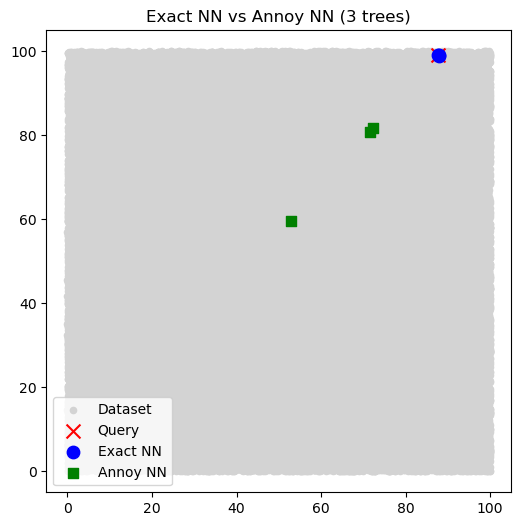

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN |Waktu komputasi Vs |
|------------------|------|-------------|----------------------------------|--------------------|
| Euclidean        | 3    | 1000        | [219 898 593], [219 898 770]    | 1.2271 , 0.1233   |
| Euclidean        | 8    | 1000        |[219 898 593], [219, 898, 593]                          | 0.7789, 0.1516               |
| Euclidean        | 3    | 100000      | [64040 64186 88792], [64040, 64186, 88792]                             | 12.5229, 0.1757           |
| Angular          | 3    | 1000        |[219 898 593], [219, 429, 540]                            | 0.7041, 0.1545               |
| Angular          | 8    | 1000        |  [219 898 593], [219, 429, 540]                             | 0.998, 0.1531                |
| Angular          | 3    | 100000      | [64040 64186 88792], [64040, 1310, 9720]                           | 8.914, 0.3283             |


In [3]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1000000  # 5 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [269630 804377 312985 776031 370166]
Exact NN time: 0.21 seconds
Annoy result: [782520, 20951, 403475, 74713, 284663]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN |Waktu komputasi Vs |
|------------------|------|-------------|----------------------------------|--------------------|
| Euclidean        | 8    | 1000000        | [269630 804377 312985 776031 370166], [887704, 467451, 152997, 676975, 131166]   | 0.248 , 0.0   |
| Angular      | 8    | 1000000        |  [ 45743 910736 719534 416455 143689],[438655, 999602, 774407, 581777, 26177]   |  0.131 , 0.0   |

**Kenapa code dibagian build index tidak dihitung waktunya?**
Karena stopwatch (time.time()) hanya dimulai setelah proses pembuatan indeks selesai, waktu di bagian add_item() dan build() tidak dihitung, hanya waktu pencarian (query) yang dihitung.
